1.1. Импорт данных датасета, настройка

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
pd.read_csv("/content/drive/MyDrive/X_bp22.csv", index_col=0)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836523,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [ ]:
pd.read_csv("/content/drive/MyDrive/X_nup22.csv", index_col=0)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [ ]:
X_bp_data = pd.read_csv("/content/drive/MyDrive/X_bp22.csv", index_col=0)
X_nup_data = pd.read_csv("/content/drive/MyDrive/X_nup22.csv", index_col=0)

In [ ]:
X_bp_data_df = pd.DataFrame(X_bp_data)
X_nup_data_df = pd.DataFrame(X_nup_data)

In [ ]:
print (X_bp_data_df.head(5).to_string())

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  Температура вспышки, С_2  Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  Потребление смолы, г/м2
0                         1.857143            2030.0             738.736842                        30.00                        22.267857                100.000000                          210.0                                  70.0                         3000.0                    220.0
1                         1.857143            2030.0             738.736842                        50.00                        23.750000                284.615385                          210.0                                  70.0                         3000.0                    220.0
2                         1.857143            2030.0             738.736842                        49.90                        33.00

In [ ]:
print (X_nup_data_df.head(5).to_string())

   Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0


In [ ]:
print (X_bp_data_df.shape, X_nup_data_df.shape)

(1023, 10) (1040, 3)


In [ ]:
#объединим 2 датасета в один
df = X_bp_data_df.merge(X_nup_data_df, how='inner', left_index = True, right_index = True)

In [ ]:
print(df.head(5).to_string())


   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  Температура вспышки, С_2  Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                         1.857143            2030.0             738.736842                        30.00                        22.267857                100.000000                          210.0                                  70.0                         3000.0                    220.0                   0          4.0               57.0
1                         1.857143            2030.0             738.736842                        50.00                        23.750000                284.615385                          210.0                                  70.0                         3000.0                    220.0                   0          

In [ ]:
#определим размерность
print(df.shape)

(1023, 13)


In [ ]:
#проверим информацию о наборе данных,
#индекс, столбцы и тип данных, ненулевые значения и использование памяти.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [ ]:
df = df[[
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Прочность при растяжении, МПа',
 'Модуль упругости при растяжении, ГПа',
 'Соотношение матрица-наполнитель']]

In [ ]:
df.describe(include = "all")

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа",Соотношение матрица-наполнитель
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,218.423144,44.252199,6.899222,57.153929,2466.922843,73.328571,2.930366
std,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,59.735931,45.015793,2.563467,12.350969,485.628006,3.118983,0.913222
min,1731.764635,2.436909,17.740275,14.254986,100.000000,0.603740,33.803026,0.000000,0.000000,0.000000,1036.856605,64.054061,0.389403
25%,1924.155466,500.047452,92.443497,20.608034,259.066528,266.816645,179.627520,0.000000,5.080033,49.799212,2135.850448,71.245018,2.317887
50%,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,219.198882,0.000000,6.916144,57.341920,2459.524526,73.268805,2.906878
75%,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,257.481724,90.000000,8.586293,64.944961,2767.193119,75.356612,3.552660
max,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,414.590628,90.000000,14.440522,103.988901,3848.436732,82.682051,5.591742


In [ ]:
#транспонируем
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155466,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254986,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628
"Угол нашивки, град",1023.0,44.252199,45.015793,0.000000,0.000000,0.000000,90.000000,90.000000
Шаг нашивки,1023.0,6.899222,2.563467,0.000000,5.080033,6.916144,8.586293,14.440522
Плотность нашивки,1023.0,57.153929,12.350969,0.000000,49.799212,57.341920,64.944961,103.988901


1.2. Предобработка данных

In [ ]:
#определим есть ли пустые ячейки
df.isna().sum()

,0
"Плотность, кг/м3",0
"модуль упругости, ГПа",0
"Количество отвердителя, м.%",0
"Содержание эпоксидных групп,%_2",0
"Температура вспышки, С_2",0
"Поверхностная плотность, г/м2",0
"Потребление смолы, г/м2",0
"Угол нашивки, град",0
Шаг нашивки,0
Плотность нашивки,0


все данные типа int Int64 — это неизменяемый тип значения, представляющий целые числа со знаком со значениями, которые варьируются от отрицательных 9223 372 036 854 775 808 (который представлен Int64.MinValue константой) до положительных 9 223 372 036 854 775 807 (который представлен Int64.MaxValue константой). поддерживает стандартные математические операции, такие как добавление, вычитание, деление, умножение, отрицание

1.3. EDA исследовательский анализ данных

In [ ]:
#посчитаем количество вхождений каждого уникального значения в столбце, результатом будет вывод списка с указанием каждого
#уникального значения в столбце и количества его появлений в этом столбце для каждого столбца df.
for i in list(df.columns.values):
  print(df[i].value_counts ())

Плотность, кг/м3
2030.000000    6
2000.000000    2
1980.000000    2
1950.000000    2
1910.000000    2
              ..
2150.793053    1
1948.878616    1
2011.506008    1
2021.754641    1
2002.151042    1
Name: count, Length: 1013, dtype: int64
модуль упругости, ГПа
738.736842    4
354.926997    1
985.791212    1
593.264606    1
354.752402    1
             ..
891.784984    1
787.053615    1
956.246864    1
890.889509    1
888.191563    1
Name: count, Length: 1020, dtype: int64
Количество отвердителя, м.%
129.000000    12
111.860000     8
137.983837     1
118.701288     1
153.507157     1
              ..
119.924425     1
122.273222     1
123.701492     1
122.710723     1
117.290319     1
Name: count, Length: 1005, dtype: int64
Содержание эпоксидных групп,%_2
21.250000    12
22.267857     9
21.797640     1
19.545169     1
18.309488     1
             ..
21.043501     1
20.646284     1
23.290322     1
21.442178     1
20.555344     1
Name: count, Length: 1004, dtype: int64
Температура всп

In [ ]:
#Рассчитаем коэффициент корреляции для проверки на предмет взаимосвязи каких-либо атрибутов во всех столбцах
#Построим корреляционную матрицу для представления о степени влияния факторов друг на друга и на целевую переменную.
df.corr()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Прочность при растяжении, МПа","Модуль упругости при растяжении, ГПа",Соотношение матрица-наполнитель
"Плотность, кг/м3",1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.015937,-0.068474,-0.061015,0.080304,-0.069981,-0.017602,0.003841
"модуль упругости, ГПа",-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.001840,-0.025417,-0.009875,0.056346,0.041868,0.023267,0.031700
"Количество отвердителя, м.%",-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,0.007446,0.038570,0.014887,0.017248,-0.075375,-0.065929,-0.006445
"Содержание эпоксидных групп,%_2",-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.015165,0.008052,0.003022,-0.039073,-0.023899,0.056828,0.019766
"Температура вспышки, С_2",-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.059954,0.020695,0.025795,0.011391,-0.031763,0.028414,-0.004776
"Поверхностная плотность, г/м2",0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.015692,0.052299,0.038332,-0.049923,-0.003210,0.036702,-0.006272
"Потребление смолы, г/м2",-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,1.000000,-0.015334,0.013394,0.012239,0.028602,0.050938,0.072531
"Угол нашивки, град",-0.068474,-0.025417,0.038570,0.008052,0.020695,0.052299,-0.015334,1.000000,0.023616,0.107947,0.023398,0.023003,-0.031073
Шаг нашивки,-0.061015,-0.009875,0.014887,0.003022,0.025795,0.038332,0.013394,0.023616,1.000000,0.003487,-0.059547,-0.029468,0.036437
Плотность нашивки,0.080304,0.056346,0.017248,-0.039073,0.011391,-0.049923,0.012239,0.107947,0.003487,1.000000,0.019604,0.006476,-0.004652


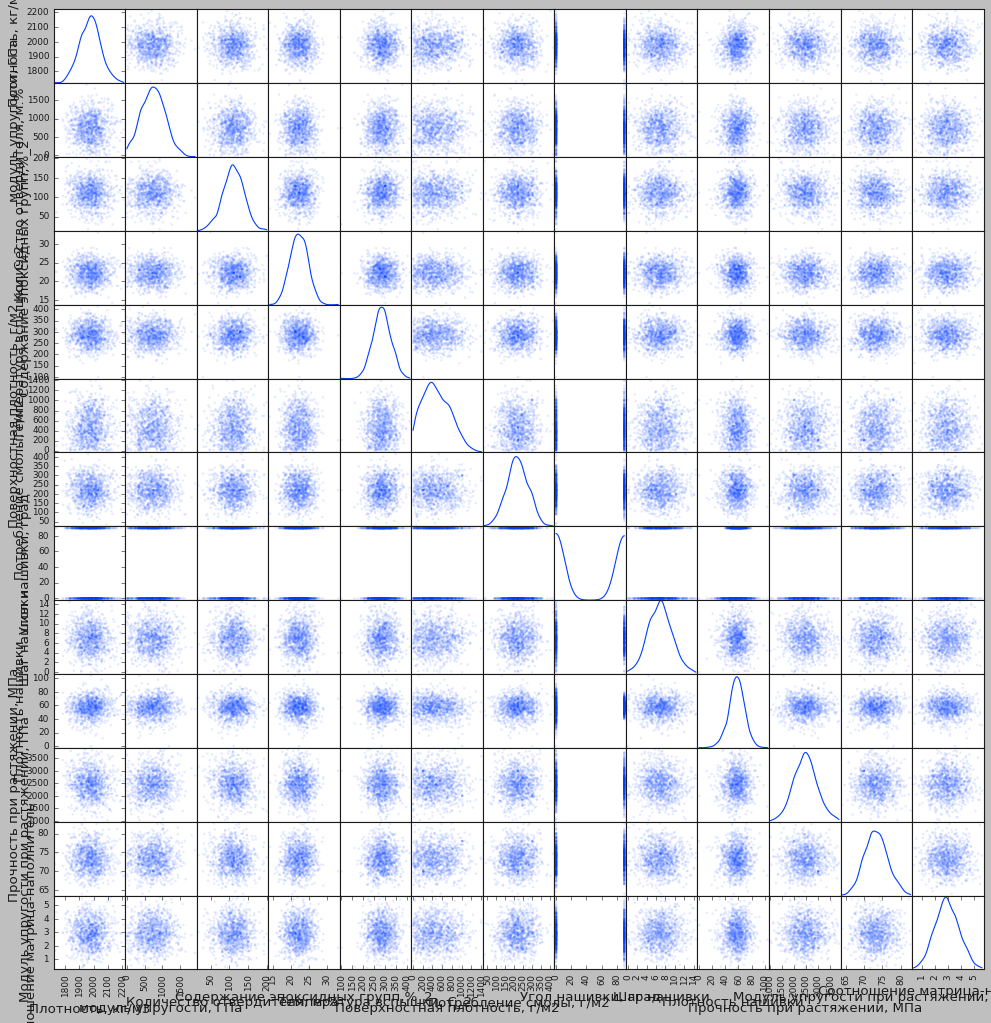

In [ ]:
#визуализируем взаимосвязь каждой пары параметров с помощью Матрицы рассеяния (scatter matrix).
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.1, diagonal='kde', figsize=(15, 15));

<Axes: >

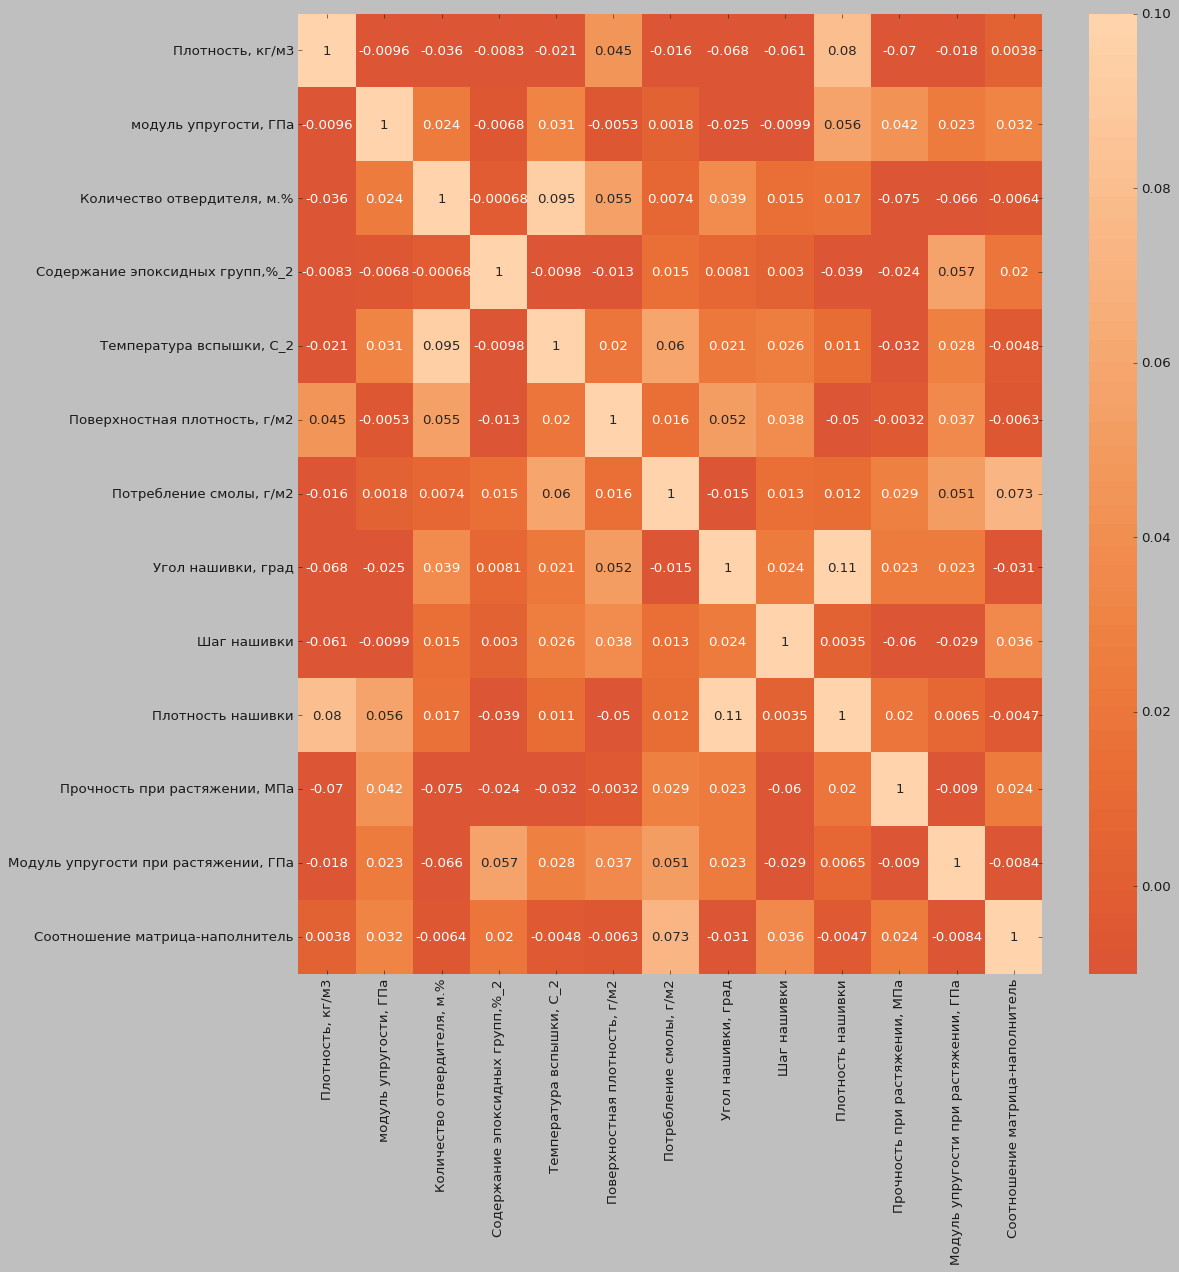

In [ ]:
#Представим графически значения параметров в виде тепловой карты
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True, vmin=-0.01, vmax=0.1, center= -0.2)

Max.значение коэф.корреляции для целевых переменных:

*   Модуль упругости при растяжении -0,066
*   Прочность при растяжении -0,075
*   Соотношение матрица-наполнитель 0,07

1.4. Фильтрация

 Отбор признаков (feature selection) с помощью оценки важности того или иного признака с помощью алгоритмов машинного обучения и отсечение ненужных производим на тестовой модели. Делим датафрейм на train и test. Разделение данных на тренировочные и тестовые помогает избежать переобучения (overfitting) и обеспечивает объективную оценку производительности модели. Разделяя данные, мы можем проверить, насколько хорошо модель справляется с задачей на данных, которые она не видела во время обучения. Это особенно важно в реальных приложениях, где модель будет использоваться для принятия решений на основе новых данных.

In [ ]:
#Выделим целевой признак, удалим остальные два через команду drop
df_MU = df.drop(["Прочность при растяжении, МПа", "Соотношение матрица-наполнитель"], axis=1)
df_y = df_MU["Модуль упругости при растяжении, ГПа"]
df_x = df_MU.drop(["Модуль упругости при растяжении, ГПа"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x,
                                                    df_y,
                                                    test_size=0.2,
                                                    random_state=0)

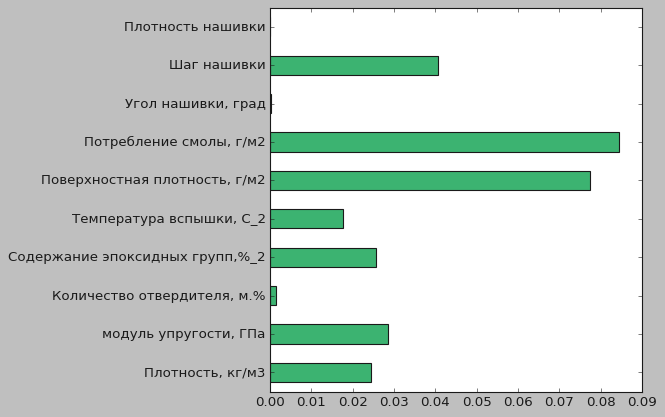

In [ ]:
from sklearn import preprocessing
from sklearn import utils
from sklearn.feature_selection import mutual_info_regression
#Оценим взаимную информацию для непрерывной целевой переменной.
#Взаимная информация между двумя случайными величинами — это неотрицательная величина, которая измеряет зависимость между переменными.
#Она равна нулю тогда и только тогда, когда две случайные величины независимы, а более высокие значения означают более высокую зависимость.Оцените взаимную информацию для непрерывной целевой переменной.


fig = plt.figure(figsize = (6,6))
importances = mutual_info_regression(X_train, y_train, random_state=45)
feature_importances = pd.Series(importances, df_MU.columns[0:len(df_MU.columns)-1])
feature_importances.plot(kind='barh', color='mediumseagreen')
plt.show()

In [ ]:
feature_importances.sort_values()

,0
Плотность нашивки,0.000000
"Угол нашивки, град",0.000220
"Количество отвердителя, м.%",0.001389
"Температура вспышки, С_2",0.017525
"Плотность, кг/м3",0.024515
"Содержание эпоксидных групп,%_2",0.025697
"модуль упругости, ГПа",0.028548
Шаг нашивки,0.040508
"Поверхностная плотность, г/м2",0.077380
"Потребление смолы, г/м2",0.084516


На основании результатов получим следующие важные признаки по получившимся значениям: 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2', 'Шаг нашивки', 'Прочность при растяжении, МПа'.

In [ ]:
# На "Модуль упругости при растяжении, ГПа" не влияют данные параметры
correlations_data = df_MU.corr()['Модуль упругости при растяжении, ГПа'].sort_values()
correlations_data

,"Модуль упругости при растяжении, ГПа"
"Количество отвердителя, м.%",-0.065929
Шаг нашивки,-0.029468
"Плотность, кг/м3",-0.017602
Плотность нашивки,0.006476
"Угол нашивки, град",0.023003
"модуль упругости, ГПа",0.023267
"Температура вспышки, С_2",0.028414
"Поверхностная плотность, г/м2",0.036702
"Потребление смолы, г/м2",0.050938
"Содержание эпоксидных групп,%_2",0.056828


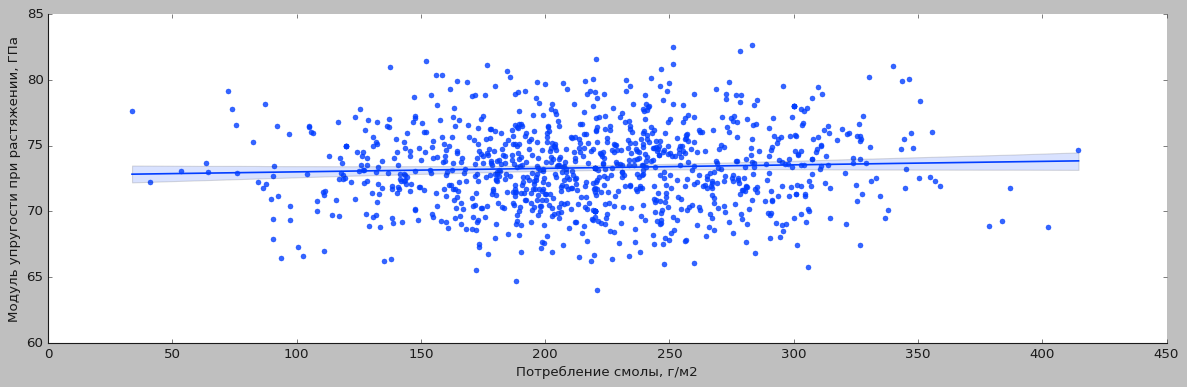

In [ ]:
#Это можно проверить и визуально на примере зависимости целевого параметра 'Модуль упругости при растяжении, ГПа' от параметра
'Потребление смолы, г/м2'
sns.lmplot(data = df_MU, x='Потребление смолы, г/м2', y='Модуль упругости при растяжении, ГПа', aspect=3, height = 5)

1.5 Выбросы

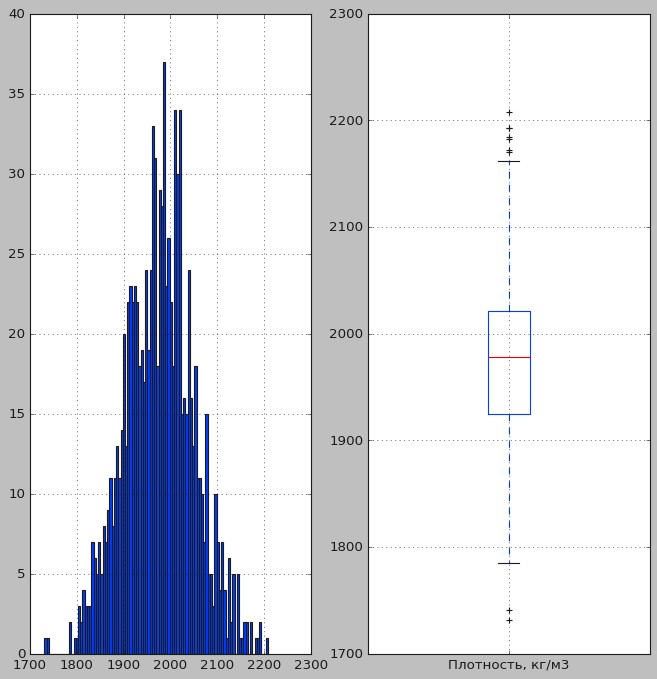

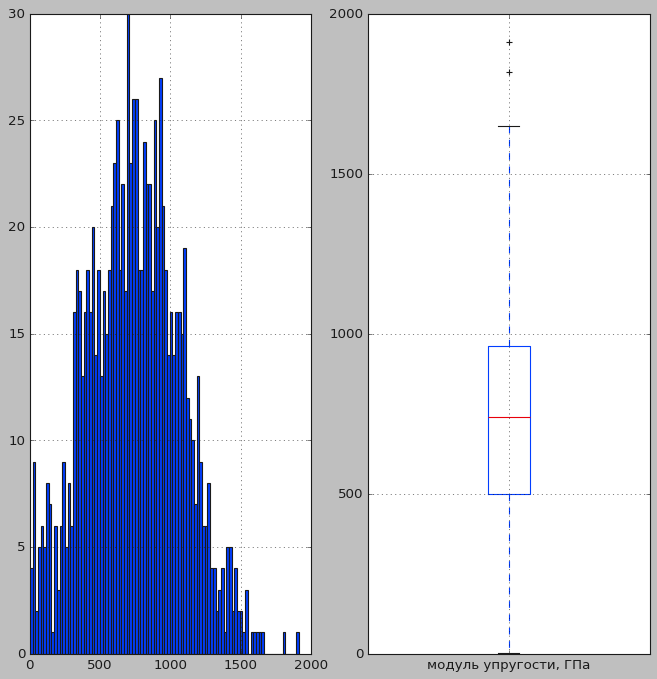

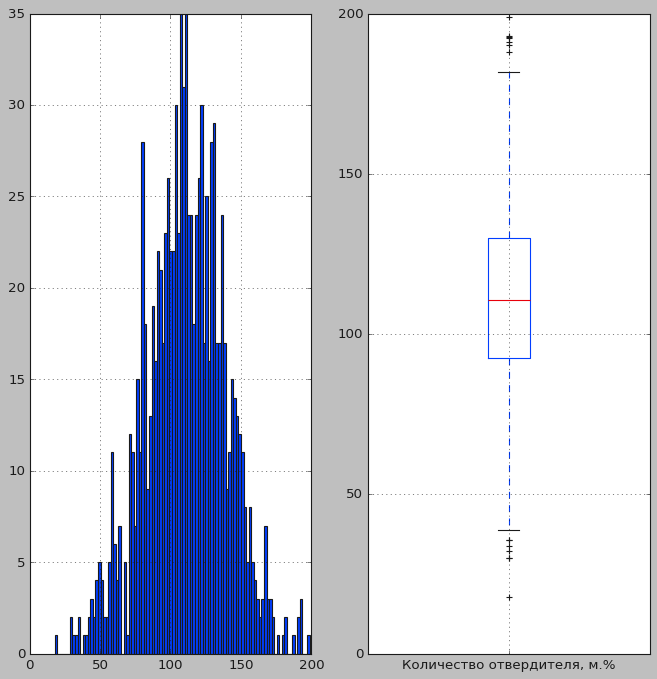

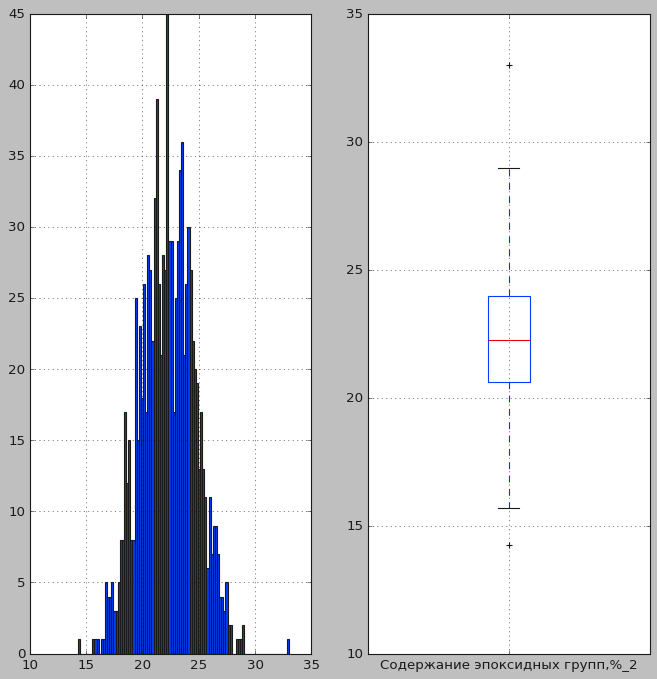

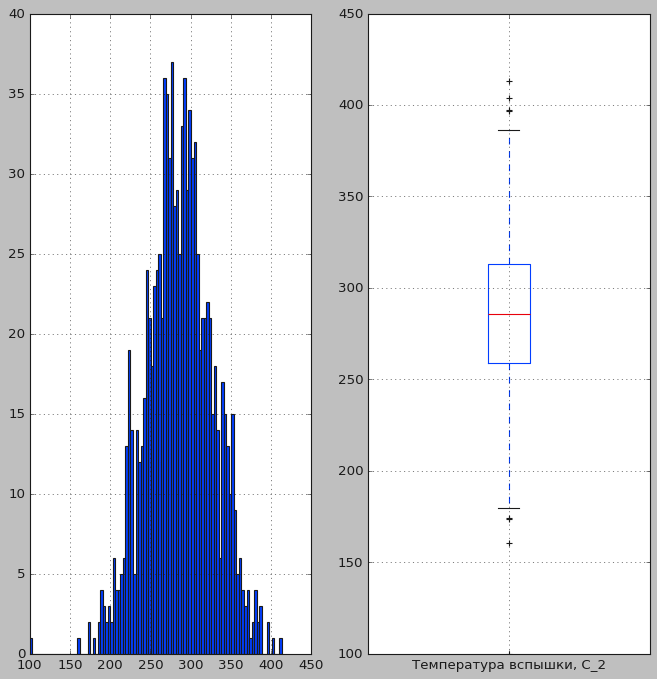

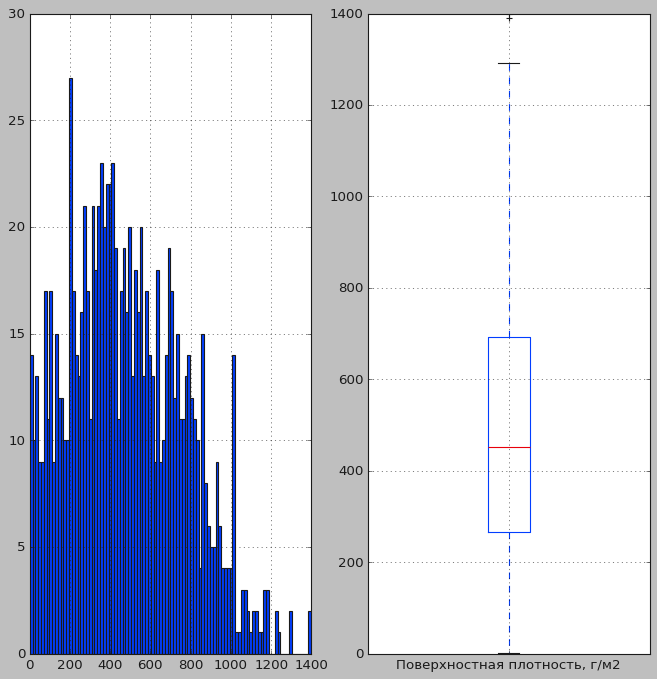

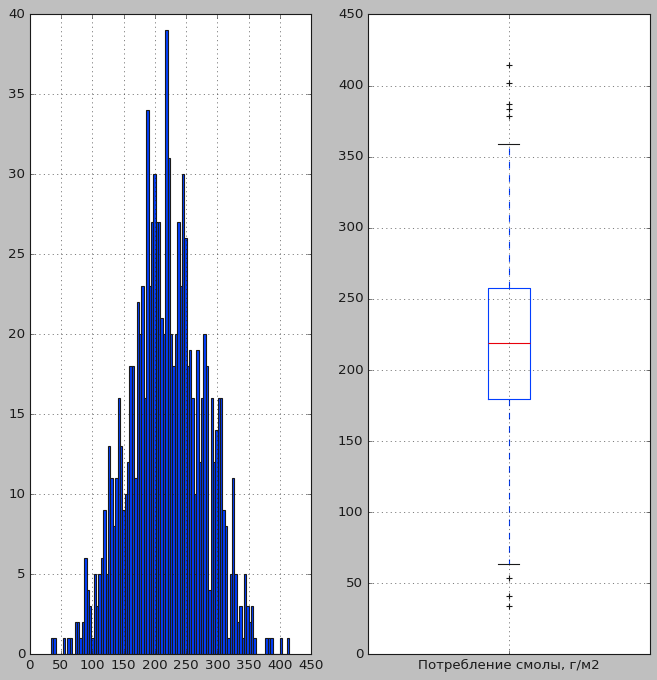

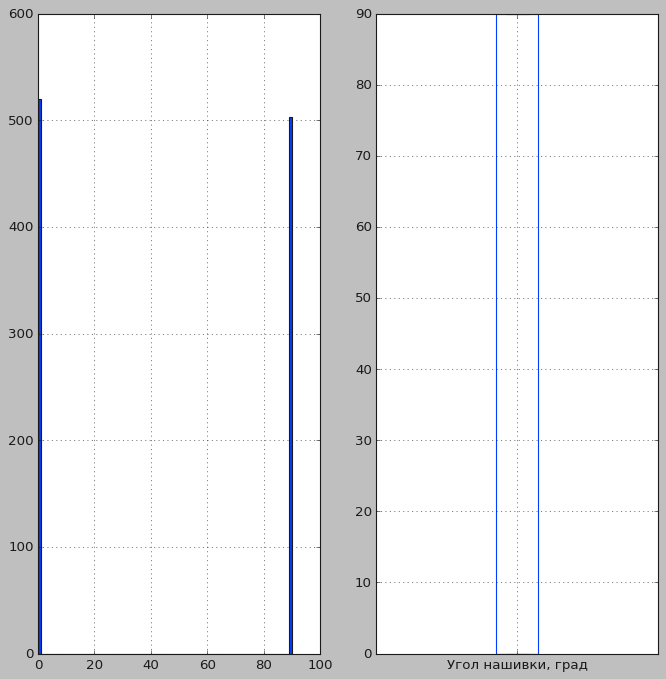

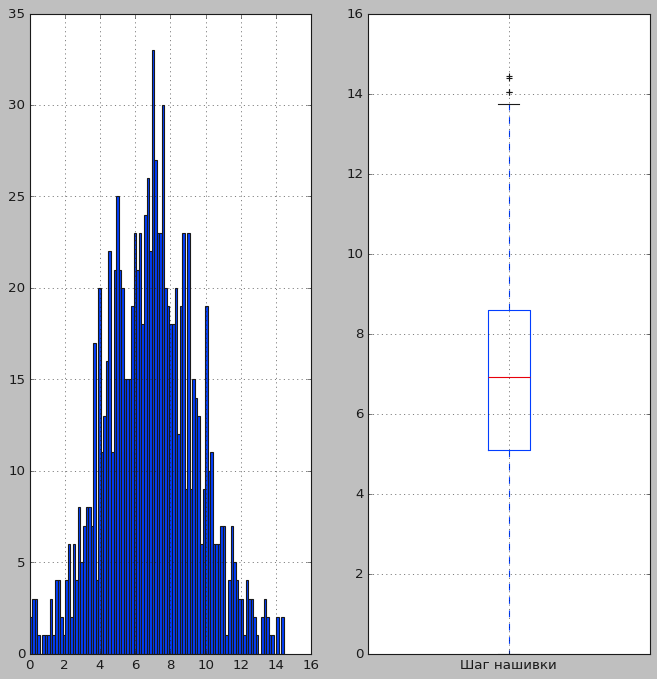

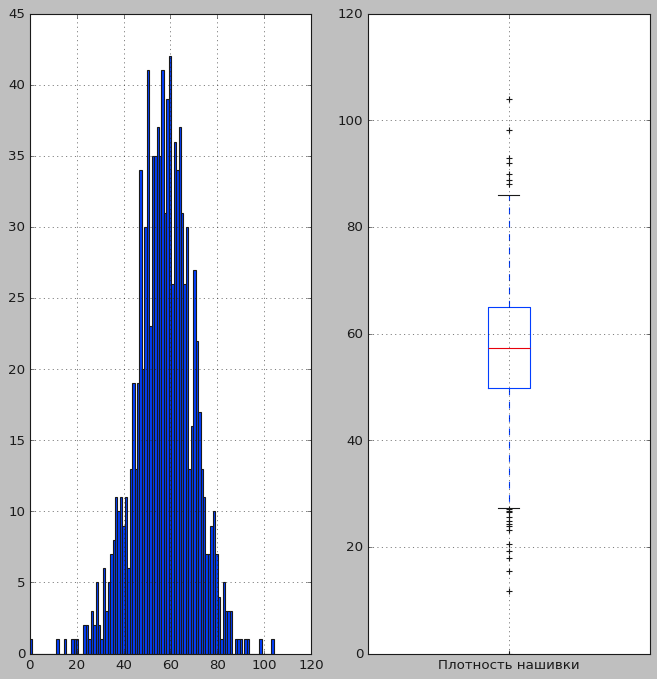

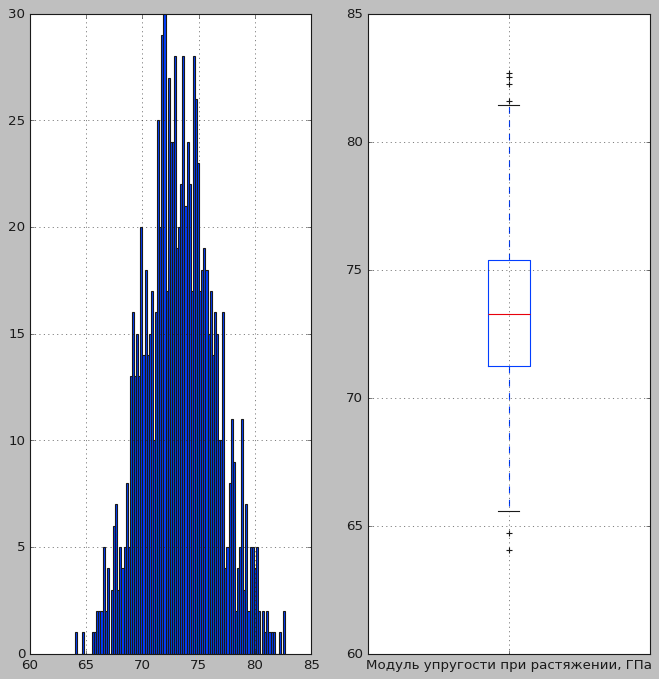

In [ ]:
# Проверим данные на наличие выбросов
# Визуально посмотрим на распределения и выбросы
# Все признаки (кроме 2) имеют нормальное распределение Гаусса, а параметр "угол нашивки" - бимодальное (2 пика на графике)
for i in list(df_MU.columns.values):
  plt.figure (figsize = (10,10))
  plt.subplot (121)# несколько окон
  df_MU[i].hist(bins=100)
  plt.subplot (122)
  df.boxplot(column=[i]);



In [ ]:
#Проверка на нормальность в Scipy используется для проведения теста Шапиро-Уилка,
#который является статистическим тестом на нормальность распределения выборки.
#определяем, взяты ли данные из нормально распределенной генеральной совокупности.
import scipy
for i in list(df_MU.columns.values):
  stat, p = scipy.stats.shapiro(df_MU[i])
  print(i)
  print('Statistics=%.3f, p-value=%.3f' % (stat, p))

  alpha = 0.05
  if p > alpha:
      print('Данные, скорее всего, нормально распределены')
  else:
      print('Данные, скорее всего, не нормально распределены')

Плотность, кг/м3
Statistics=0.999, p-value=0.550
Данные, скорее всего, нормально распределены
модуль упругости, ГПа
Statistics=0.996, p-value=0.007
Данные, скорее всего, не нормально распределены
Количество отвердителя, м.%
Statistics=0.998, p-value=0.209
Данные, скорее всего, нормально распределены
Содержание эпоксидных групп,%_2
Statistics=0.998, p-value=0.265
Данные, скорее всего, нормально распределены
Температура вспышки, С_2
Statistics=0.998, p-value=0.283
Данные, скорее всего, нормально распределены
Поверхностная плотность, г/м2
Statistics=0.978, p-value=0.000
Данные, скорее всего, не нормально распределены
Потребление смолы, г/м2
Statistics=0.999, p-value=0.708
Данные, скорее всего, нормально распределены
Угол нашивки, град
Statistics=0.636, p-value=0.000
Данные, скорее всего, не нормально распределены
Шаг нашивки
Statistics=0.998, p-value=0.176
Данные, скорее всего, нормально распределены
Плотность нашивки
Statistics=0.993, p-value=0.000
Данные, скорее всего, не нормально расп

In [ ]:
#Удаление выбросов
from scipy import stats
df_filtered = df_MU.copy()
df_filtered = df_filtered[(np.abs(stats.zscore(df_MU)) < 2.5).all(axis=1)]
df_filtered.describe()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа"
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,1973.860620,731.401297,111.056368,22.207376,286.014837,477.107194,218.179365,45.543359,6.887547,57.096612,73.259028
std,70.118028,321.923704,26.427439,2.323873,39.651547,274.827292,57.162421,45.021436,2.411469,11.408243,3.009838
min,1801.940695,2.436909,40.304806,16.391595,186.508613,0.603740,72.530873,0.000000,0.571835,26.559894,65.553336
25%,1923.787286,497.412391,93.260237,20.583073,259.211711,264.063336,179.766002,0.000000,5.124226,49.860400,71.219440
50%,1977.126504,731.867638,110.615466,22.192903,285.811108,453.919475,219.249718,90.000000,6.908628,57.341920,73.219286
75%,2019.796983,950.526573,130.055633,23.959367,312.885525,690.820893,257.106878,90.000000,8.556590,64.513479,75.255148
max,2158.794836,1546.290886,181.032809,27.920843,386.067992,1182.326112,359.052220,90.000000,13.246219,86.012427,81.053293


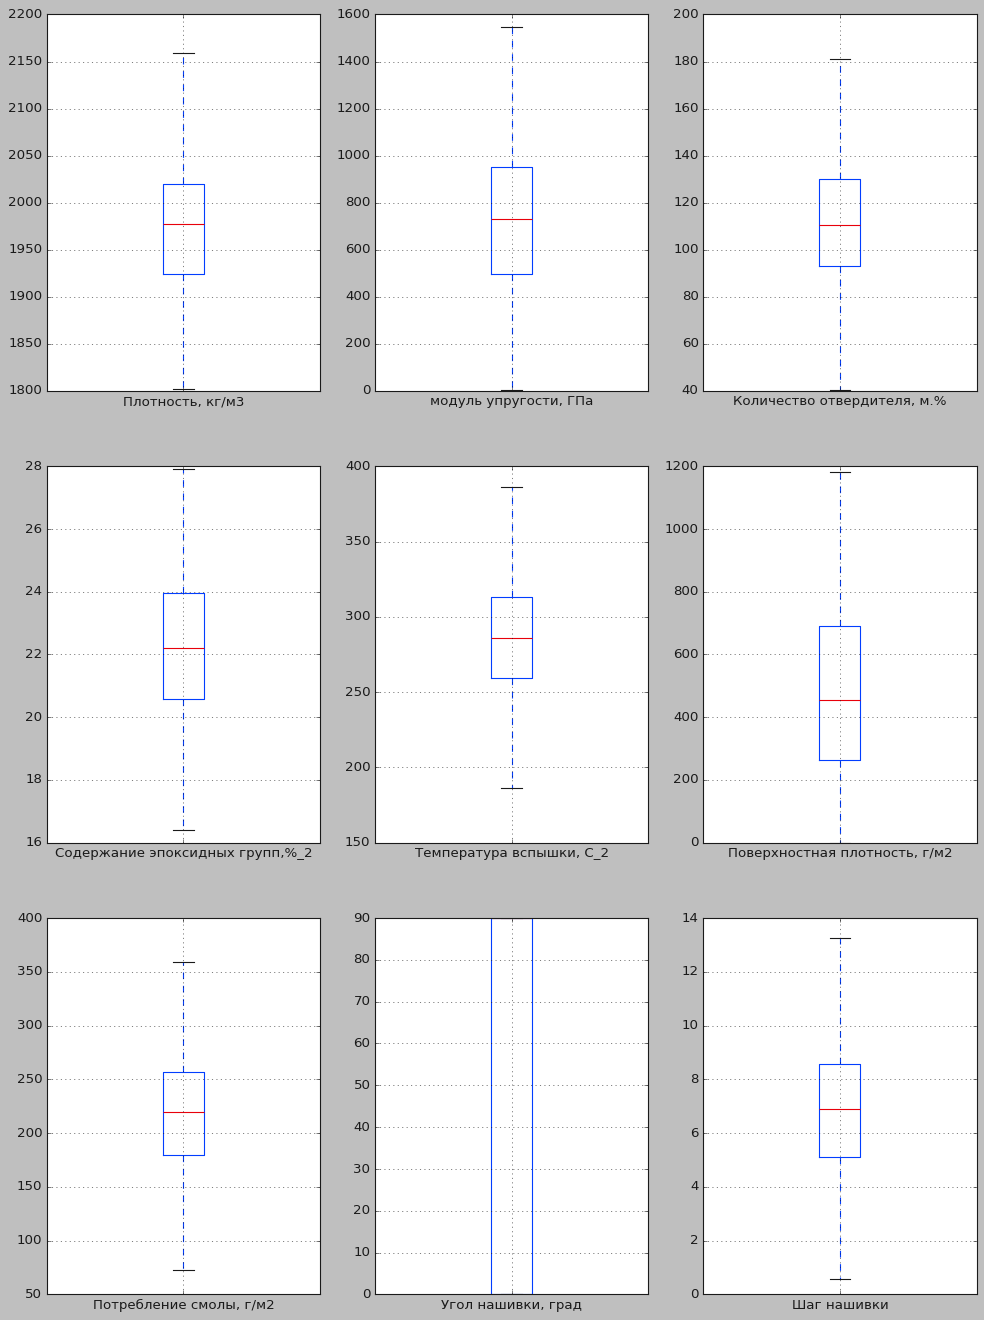

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (15,20))
cols = list(df_filtered.columns.values)
i = 0
for k in range(3):
  for j in range(3):
    df_filtered.boxplot(column=[cols[i]], ax = axes[k][j])
    i = i+1

1.7. Преобразование данных - нормализация

In [ ]:
df_filtered_1 = df_filtered.drop(["модуль упругости, ГПа", "Поверхностная плотность, г/м2"], axis=1)

In [ ]:
#Применяем метод Бокс-Кокса для стабилизации дисперсии и улучшения нормальности распределений данных в текущих условиях
#это преобразование повышает достоверность статистических моделей и надежность выводов, сделанных на основе данных.
#Модуль упругости, поверхностная плотность (Бокс-Кокса можно применять только к строго положительным данным)
df_no_norm = df_filtered[["модуль упругости, ГПа", "Поверхностная плотность, г/м2"]]

In [ ]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)

In [ ]:
df_norm_1 = pt.fit_transform(df_no_norm)

In [ ]:
df_norm_1 = pd.DataFrame(data = df_norm_1, columns=list(df_no_norm.columns.values))
df_norm_1.head()

,"модуль упругости, ГПа","Поверхностная плотность, г/м2"
0,348.299322,48.311243
1,348.299322,48.311243
2,354.125630,48.311243
3,352.084912,48.311243
4,376.051334,48.311243


In [ ]:
df_norm_1.describe()

,"модуль упругости, ГПа","Поверхностная плотность, г/м2"
count,911.000000,911.000000
mean,340.813597,79.628507
std,134.067442,33.687863
min,1.341736,-0.430139
25%,247.081980,56.323836
50%,345.487926,80.776219
75%,433.402848,106.642289
max,660.712926,151.922427


<Axes: >

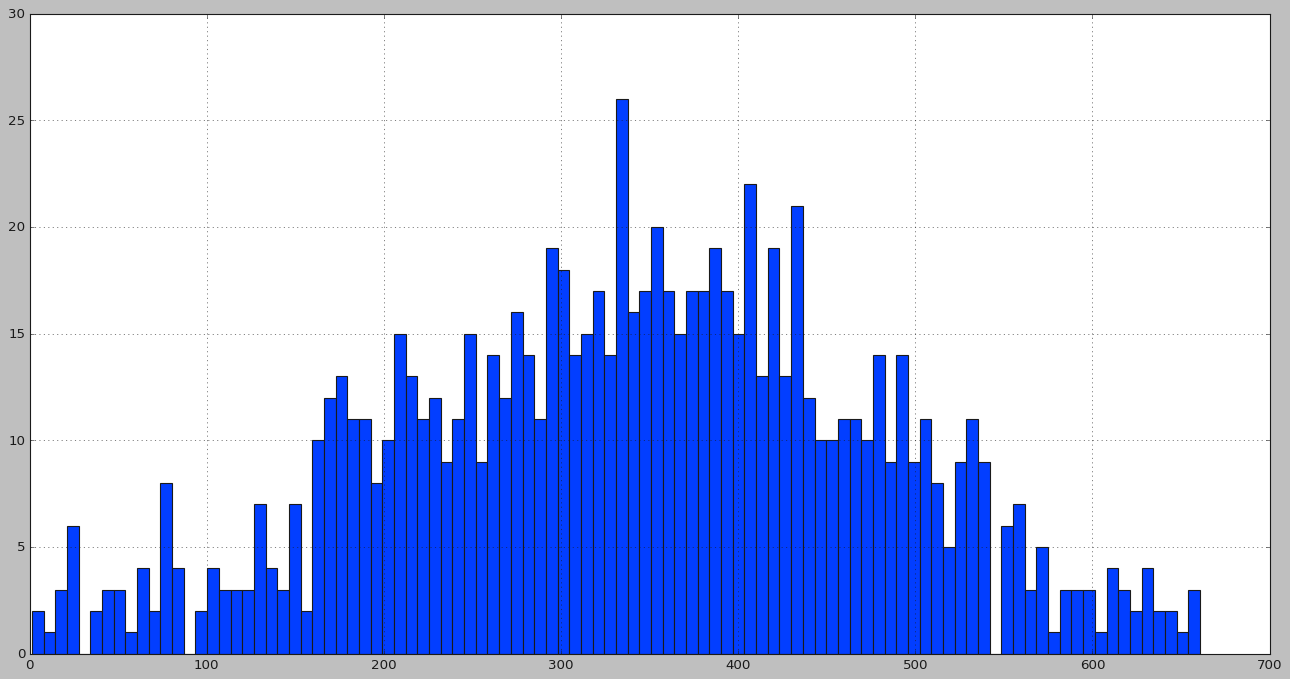

In [ ]:
plt.figure (figsize = (20,10))

df_norm_1['модуль упругости, ГПа'].hist(bins=100)

In [ ]:
df_norm = df_norm_1.merge(df_filtered_1, how='inner', left_index = True, right_index = True)

In [ ]:
df_norm.describe()

,"модуль упругости, ГПа","Поверхностная плотность, г/м2","Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа"
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,344.595955,79.289307,1974.447313,110.832745,22.214658,285.588829,218.328274,39.689441,6.887312,56.941225,73.233486
std,134.151577,33.874901,71.248427,26.408543,2.335549,39.824273,56.924482,44.713326,2.450508,11.733107,3.030864
min,1.341736,-0.430139,1801.940695,40.304806,16.391595,186.508613,72.530873,0.000000,0.571835,26.559894,65.553336
25%,248.942940,55.866060,1923.811976,93.290977,20.583309,258.991905,179.858423,0.000000,5.030449,49.516439,71.175111
50%,349.419206,80.363849,1977.302956,110.738213,22.208465,285.811108,219.350696,0.000000,6.916144,57.094641,73.181410
75%,435.663145,106.443864,2020.947411,129.947268,23.967543,312.425316,257.147388,90.000000,8.595968,64.578552,75.230994
max,660.712926,151.922427,2158.794836,181.032809,27.920843,386.067992,359.052220,90.000000,13.246219,86.012427,81.053293


In [ ]:
df_norm = df_norm[[
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Потребление смолы, г/м2',
 'Шаг нашивки',
 'Модуль упругости при растяжении, ГПа']]

In [ ]:
df_norm.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки,"Модуль упругости при растяжении, ГПа"
1,2030.0,348.299322,50.00,23.750000,284.615385,48.311243,220.0,4.0,70.0
3,2030.0,352.084912,129.00,21.250000,300.000000,48.311243,220.0,5.0,70.0
4,2030.0,376.051334,111.86,22.267857,284.615385,48.311243,220.0,5.0,70.0
5,2000.0,263.220765,111.86,22.267857,284.615385,71.786054,220.0,5.0,70.0
6,1910.0,408.972320,111.86,22.267857,284.615385,71.786054,220.0,5.0,70.0


In [ ]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
"Плотность, кг/м3",805.0,1974.447313,71.248427,1801.940695,1923.811976,1977.302956,2020.947411,2158.794836
"модуль упругости, ГПа",805.0,344.595955,134.151577,1.341736,248.942940,349.419206,435.663145,660.712926
"Количество отвердителя, м.%",805.0,110.832745,26.408543,40.304806,93.290977,110.738213,129.947268,181.032809
"Содержание эпоксидных групп,%_2",805.0,22.214658,2.335549,16.391595,20.583309,22.208465,23.967543,27.920843
"Температура вспышки, С_2",805.0,285.588829,39.824273,186.508613,258.991905,285.811108,312.425316,386.067992
"Поверхностная плотность, г/м2",805.0,79.289307,33.874901,-0.430139,55.866060,80.363849,106.443864,151.922427
"Потребление смолы, г/м2",805.0,218.328274,56.924482,72.530873,179.858423,219.350696,257.147388,359.052220
Шаг нашивки,805.0,6.887312,2.450508,0.571835,5.030449,6.916144,8.595968,13.246219
"Модуль упругости при растяжении, ГПа",805.0,73.233486,3.030864,65.553336,71.175111,73.181410,75.230994,81.053293


1.8. Преобразование данных - стандартизация

/tmp/ipython-input-273-1081046369.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_norm[i])
/tmp/ipython-input-273-1081046369.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_norm[i])
/tmp/ipython-input-273-1081046369.py:4: UserWarning: 

`distplot` is a depreca

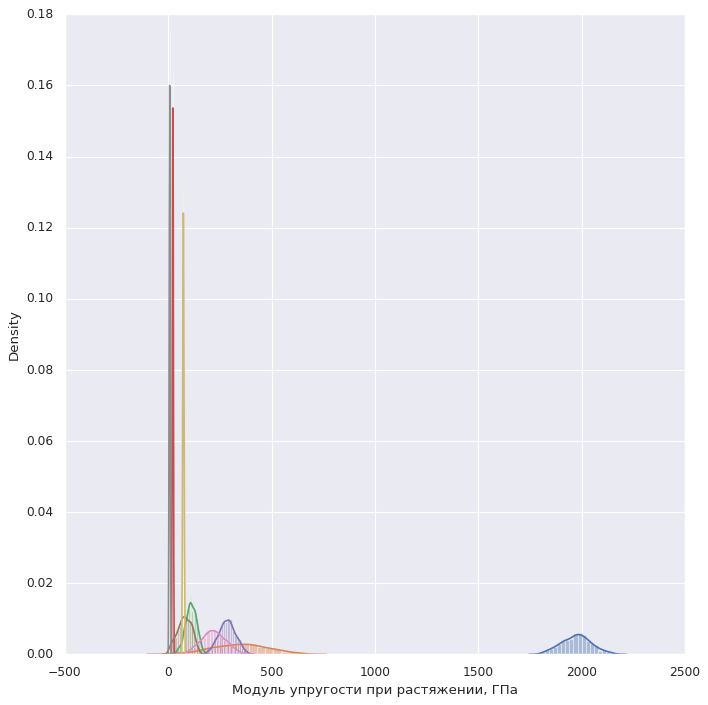

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})

for i in list(df_norm.columns.values):
  sns_plot = sns.distplot(df_norm[i])
  fig = sns_plot.get_figure()

In [ ]:
from sklearn import preprocessing
df_MU = df_norm.copy()
df_MU_x = df_MU.drop(["Модуль упругости при растяжении, ГПа"], axis=1)
df_MU_y = df_MU[["Модуль упругости при растяжении, ГПа"]]
standart_scaler_x = preprocessing.StandardScaler()
standart_scaler_y = preprocessing.StandardScaler()

MU_scaled_x = standart_scaler_x.fit_transform(df_MU_x)
MU_scaled_y = standart_scaler_y.fit_transform(df_MU_y)
#стандартизируем признаки, вычитая среднее и затем масштабируем к единичной дисперсии.

In [ ]:
MU_scaled_x

array([[ 0.7801888 ,  0.02762301, -2.30495733, ..., -0.91505279,
         0.0293857 , -1.17898276],
       [ 0.7801888 ,  0.0558593 ,  0.68835869, ..., -0.91505279,
         0.0293857 , -0.7706504 ],
       [ 0.7801888 ,  0.23462217,  0.03892279, ..., -0.91505279,
         0.0293857 , -0.7706504 ],
       ...,
       [ 1.19644796, -0.98972074,  1.57781338, ...,  0.95462674,
        -0.17489753, -0.93257606],
       [ 0.10985163,  0.0359761 , -1.46174135, ...,  0.6575159 ,
         0.2054127 ,  0.25861059],
       [ 1.75896019, -0.9881395 , -1.53355497, ...,  1.00905384,
        -0.18698344, -0.20199038]])

In [ ]:
df_MU_scaled_x = pd.DataFrame(data = MU_scaled_x, columns=list(df_MU_x.columns.values) )
df_MU_scaled_x.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки
0,0.780189,0.027623,-2.304957,0.657788,-0.024459,-0.915053,0.029386,-1.178983
1,0.780189,0.055859,0.688359,-0.413290,0.362094,-0.915053,0.029386,-0.770650
2,0.780189,0.234622,0.038923,0.022792,-0.024459,-0.915053,0.029386,-0.770650
3,0.358865,-0.606968,0.038923,0.022792,-0.024459,-0.221637,0.029386,-0.770650
4,-0.905106,0.480176,0.038923,0.022792,-0.024459,-0.221637,0.029386,-0.770650


In [ ]:
df_MU_scaled_x.describe().T

,count,mean,std,min,25%,50%,75%,max
"Плотность, кг/м3",805.0,-2.705358e-15,1.000622,-2.422704,-0.711129,0.040105,0.653053,2.588999
"модуль упругости, ГПа",805.0,-4.060244e-16,1.000622,-2.560295,-0.713465,0.035976,0.679260,2.357881
"Количество отвердителя, м.%",805.0,3.629947e-16,1.000622,-2.672309,-0.664659,-0.003582,0.724251,2.659886
"Содержание эпоксидных групп,%_2",805.0,3.442381e-16,1.000622,-2.494781,-0.698921,-0.002653,0.750990,2.444707
"Температура вспышки, С_2",805.0,-5.560769e-16,1.000622,-2.489482,-0.668272,0.005585,0.674292,2.524632
"Поверхностная плотность, г/м2",805.0,4.192643e-17,1.000622,-2.354812,-0.691893,0.031741,0.802111,2.145490
"Потребление смолы, г/м2",805.0,-1.412259e-16,1.000622,-2.562835,-0.676225,0.017972,0.682365,2.473653
Шаг нашивки,805.0,4.060244e-16,1.000622,-2.578814,-0.758217,0.011773,0.697700,2.596548


/tmp/ipython-input-278-346929168.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns_plot = sns.kdeplot(df_MU_scaled_x[i], shade=False)
/tmp/ipython-input-278-346929168.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns_plot = sns.kdeplot(df_MU_scaled_x[i], shade=False)
/tmp/ipython-input-278-346929168.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns_plot = sns.kdeplot(df_MU_scaled_x[i], shade=False)
/tmp/ipython-input-278-346929168.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns_plot = sns.kdeplot(df_MU_scaled_x[i], s

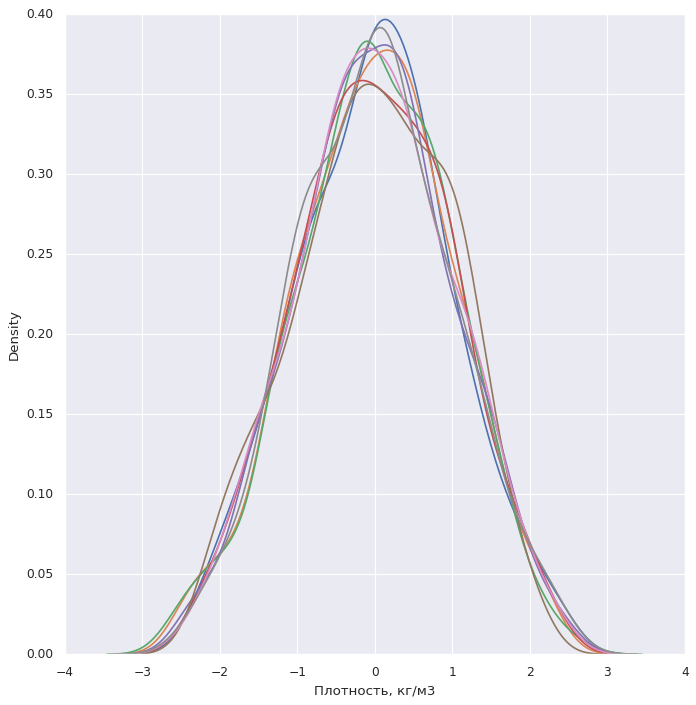

In [ ]:
#snsplot = sns.kdeplot(data['sepal width (cm)'], shade=True)
#fig = snsplot.get_figure()
for i in list(df_MU_scaled_x.columns.values):
  sns_plot = sns.kdeplot(df_MU_scaled_x[i], shade=False)
  fig = sns_plot.get_figure()

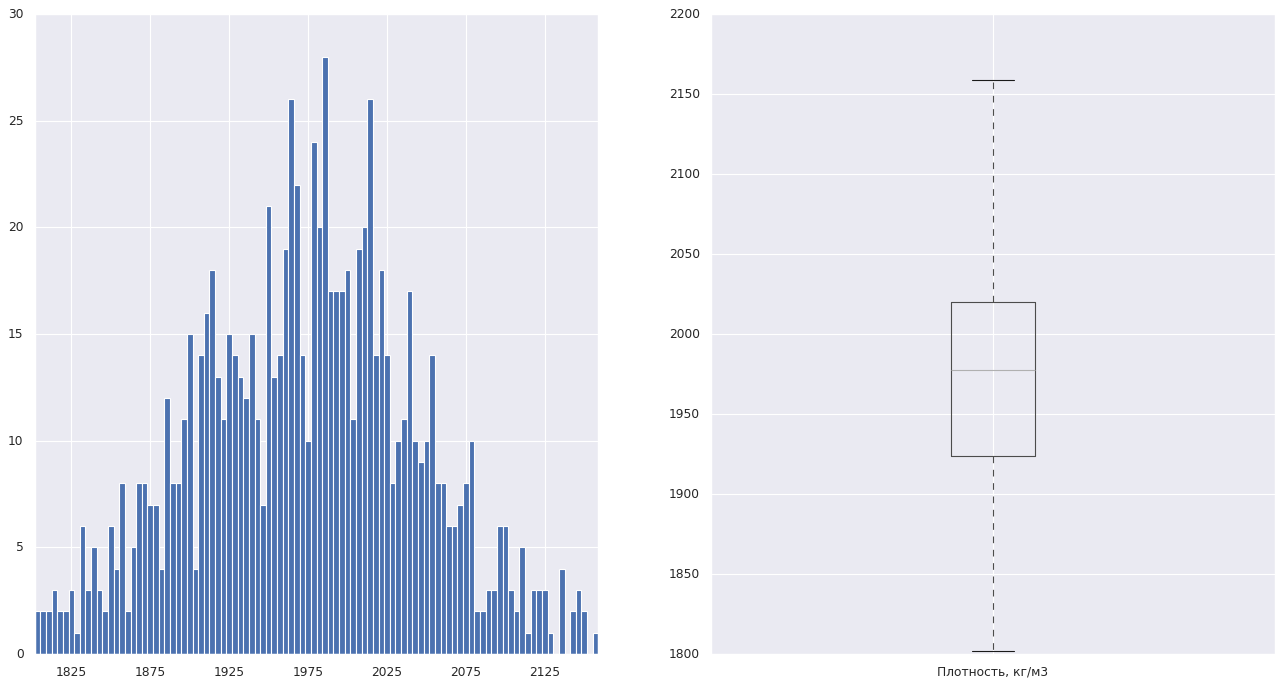

In [ ]:
#До стандартизации
plt.figure (figsize = (20,10))
plt.subplot (121)# несколько окон
plt.xticks (np.arange(1725, 2250, 50))
df_filtered['Плотность, кг/м3'].hist(bins=100)
plt.subplot (122)
df_filtered.boxplot(column=['Плотность, кг/м3']);

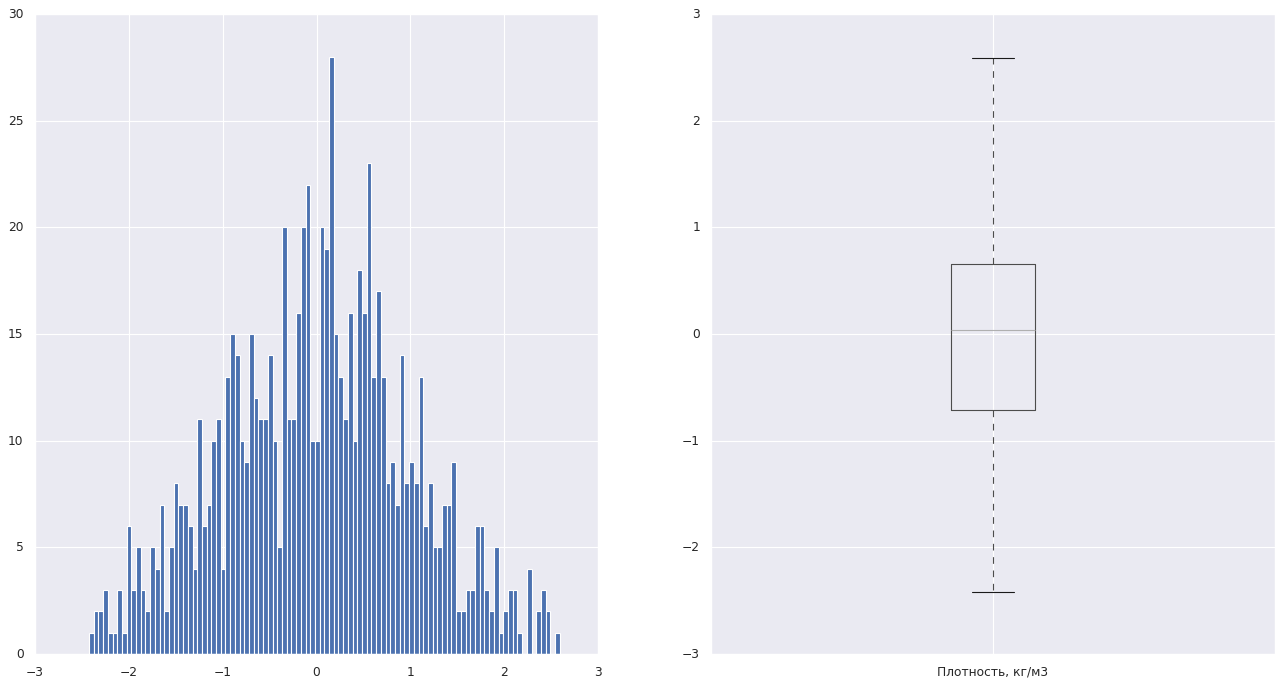

In [ ]:
#После
plt.figure (figsize = (20,10))
plt.subplot (121)# несколько окон
df_MU_scaled_x['Плотность, кг/м3'].hist(bins=100)
plt.subplot (122)
df_MU_scaled_x.boxplot(column=['Плотность, кг/м3']);

In [358]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.9. Разделение выборки на обучающую и тестовую (30%)

Это поможет оценить реальную производительность модели и избежать проблемы переобучения (overfitting)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MU_scaled_x,
                                                    MU_scaled_y[:, 0],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    shuffle=True)

1.10. Обучение и оценка качества модели

Построим модельдля предсказания - "Модуль упругости при растяжении, ГПа".
Для этого удалим столбец "Угол нашивки, град", т.к. данный параметр имеет бимодальное распределение. Также удалим столбец "Прочность при растяжении, МПа",т.к для него также нужна была бы отдельная модель.
Коэффициент детерминации, также называемый оценкой R2, используется для оценки производительности модели линейной регрессии.
Оценка r2 для идеальной модели составляет 1,0
Оценка r2 для модели, которая прогнозирует среднее значение, всегда равна 0,0
Оценка r2 для худшей модели -2,0
R^2 score — последняя мера оценки регрессионных моделей в этой статье, которая от перечисленных выше двух отличается тем, что может принимать отрицательное значение при плохой обобщающей способности модели

Коэффициент детерминации R2 показывает силу связи между двумя случайными величинами. Если модель всегда предсказывает точно, метрика равна 1. Для тривиальной модели - 0. Значение метрики может быть отрицательно, если модель предсказывает хуже, чем тривиальная.

RMSE (корень из среднеквадратичной ошибки) - разброс между предсказанными и истинными значениями. Это, по сути, корень из MSE. Выражается в тех же единицах, что и целевая переменная. Чаще применяется при статистическом анализа данных. Данная метрика очень чувствительна к аномалиям и выбросам. Идеальное значение = 0.

MAE (средняя абсолютная ошибка) показывает средний квадрат отклонений предсказанных значений от реальных и показывает оценку точности модели регрессии, т.е. насколько близки предсказываемые параметры к фактическим. Чем выше значение MAE, тем модель хуже. У идеальной модели MAE=0

MAPE (средняя абсолютная ошибка в процентах) выражается в процентах и имеет хорошую интерпретируемость. Идеальная модель имеет MAPE=0. Верхний предел - не ограничен.

При выбросах мы можем применить:
MedAE (медианная абсолютная ошибка) похожа на среднюю абсолютную, но более устойчива к аномалиям. Применяется в задачах, когда известно, что в данных присутствуют выбросы, аномальные , непоказательные значения. median_absolute_error(y_true, y_pred)

ME (максимальная ошибка) показывает наихудший случай предсказания модели.
В некоторых задачах важно, чтобы модель не ошибалась сильно, а небольшие отклонения не критичны. Зачастую эта метрика используется как вспомогательная совместно с другими. max_error(y_true, y_pred)


In [ ]:
from pandas import read_csv, DataFrame
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

## LinearRegression

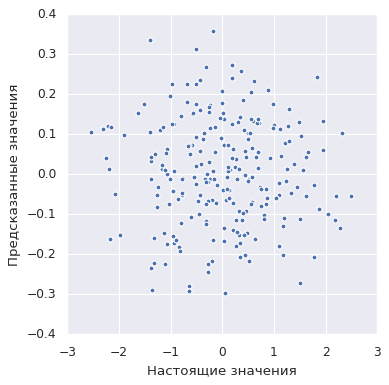

TypeError: return arrays must be of ArrayType

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.figure (figsize = (5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', np.sqrt('', metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Коэффициенты регрессии:', regressor.coef_)
print(regressor.intercept_)


In [ ]:
#Преобразуем в исходный масштаб
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = standart_scaler_y.inverse_transform(y_pred_df)

y_test_df = pd.DataFrame(y_test)
y_test_df = standart_scaler_y.inverse_transform(y_test_df)

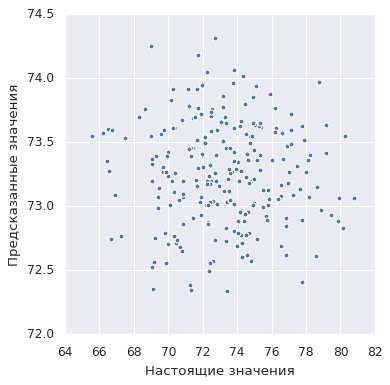

In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test_df, y_pred_df)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

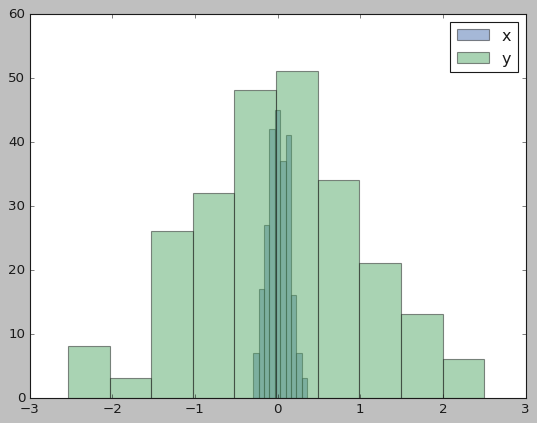

In [ ]:
#bins = np.linspace(60, 80, 100)
plt.style.use('classic')
plt.hist(y_pred, alpha = 0.5, label='x')
plt.hist(y_test, alpha = 0.5, label='y')
plt.legend(loc='upper right')
plt.show()

1.12. Регресссия Lasso
применяется для регуляризации линейной модели как способ уменьшить переобучение и упорядочить модель: чем меньше у нее будет степеней свободы, тем сложнее будет переобучить данные.

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso(alpha=0.001)
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.001),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regression.coef

AttributeError: 'GridSearchCV' object has no attribute 'coef'

In [ ]:
df_MU_scaled_x.columns

Index(['Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Потребление смолы, г/м2', 'Шаг нашивки'],
      dtype='object')

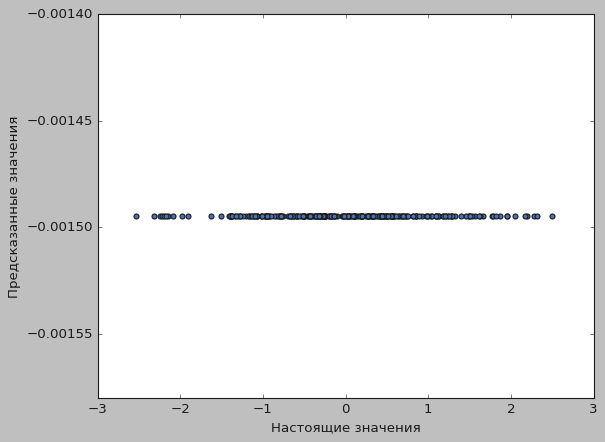

In [ ]:
y_pred = lasso_regression.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

In [ ]:
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Корень из среднеквадратичной ошибки: 0.9892123004895087
MSE: 0.9785409754397462
R2 -2.526465000474154e-05
MAPE: 1.0005617428489004


In [ ]:
# Преобразуем в исходный масштаб
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = standart_scaler_y.inverse_transform(y_pred_df)

y_test_df = pd.DataFrame(y_test)
y_test_df = standart_scaler_y.inverse_transform(y_test_df)

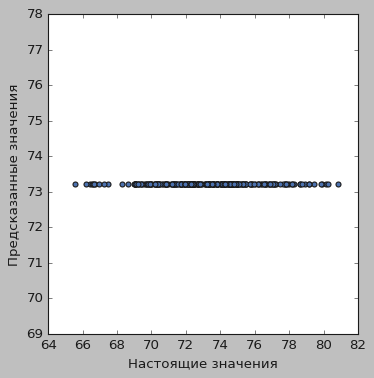

In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test_df, y_pred_df)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

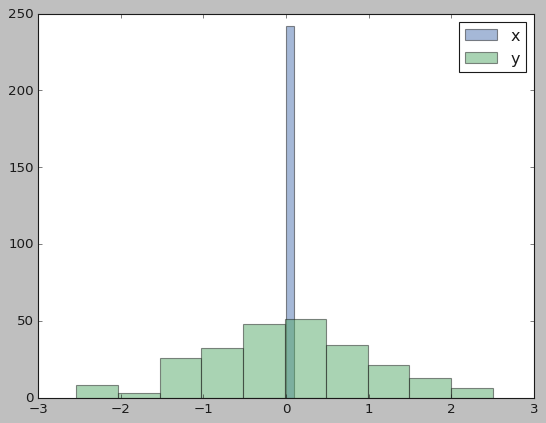

In [ ]:
plt.hist(y_pred, alpha = 0.5, label='x')
plt.hist(y_test, alpha = 0.5, label='y')
plt.legend(loc='upper right')
plt.show()

1.13 LassoCV

In [ ]:
LassoCV
#Линейная модель лассо с итеративной подгонкой вдоль пути регуляризации.
#Лучшая модель выбирается путем перекрестной проверки.

In [ ]:
lasso_regressor_2 = LassoCV(n_alphas = 500, alphas = [0.0001, 0.000005], selection = 'random',
                            n_jobs = -1, random_state=0, cv=5)
lasso_regressor_2.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 5e-06], cv=5, n_alphas=500, n_jobs=-1, random_state=0,
        selection='random')

In [ ]:
lasso_regressor_2.coef_

array([-0.01412838,  0.04060043, -0.08329741,  0.0294283 ,  0.03141295,
       -0.00859908, -0.01454256, -0.07793822])

In [ ]:
y_pred = lasso_regressor_2.predict(X_test)

In [ ]:
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Корень из среднеквадратичной ошибки: 1.0018409967504085
MSE: 1.003685382769852
R2 -0.02572172828910424
MAPE: 1.2888073990184912


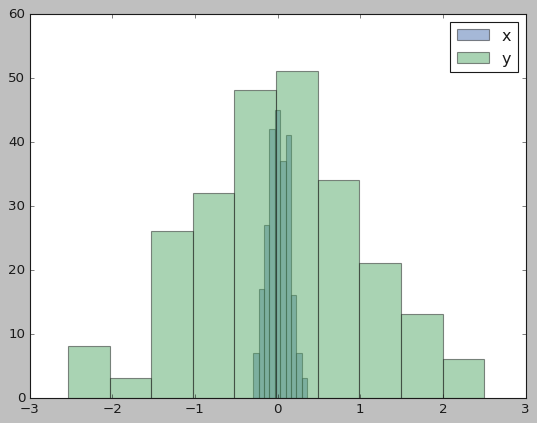

In [ ]:
plt.hist(y_pred, alpha = 0.5, label='x')
plt.hist(y_test, alpha = 0.5, label='y')
plt.legend(loc='upper right')
plt.show()

1.14 KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

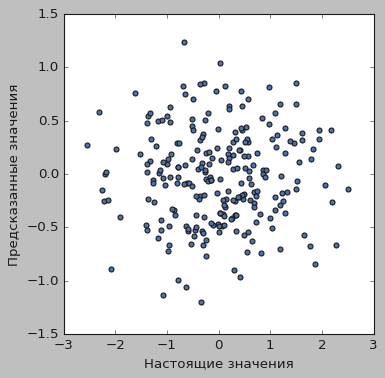

Корень из среднеквадратичной ошибки: 1.075397606159339
MSE: 1.156480011333237
R2 -0.18187102883069084
MAPE: 2.2007876756917977


In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
errors = []

for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    errors.append(e)

In [ ]:
errors = []

for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    errors.append(e)

In [ ]:
#Подберём параметры, используя GridSearchCV
n_neighbors = list(range(1, 50))
p = [1, 2]
weights = ["uniform", "distance"]
metric = ['mahalanobis', 'minkowski',
          'cosine', 'chebyshev',
          'correlation', 'euclidean']
algorithm = ['ball_tree', 'kd_tree',
             'brute']

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p, metric=metric,algorithm=algorithm )

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()

In [ ]:
search = GridSearchCV(knn, hyperparameters, cv=10, verbose=1)
best_model = search.fit(X_train, y_train)

Fitting 10 folds for each of 3528 candidates, totalling 35280 fits


Выходные данные были обрезаны до нескольких последних строк (5000).
    chunked_results = list(
                      ^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py", line 2244, in pairwise_distances_chunked
    params = _precompute_metric_params(X, Y, metric=metric, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/pairwise.py", line 2074, in _precompute_metric_params
    raise ValueError(
ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimato

In [ ]:
best_model.best_estimator

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [ ]:
knn = best_model.best_estimator_

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

Корень из среднеквадратичной ошибки: 0.9953799553824804
MAE: 0.796791026972901
R2 -0.012534285417760804
MAPE: 1.1930164716643517


In [ ]:
# Преобразуем в исходный масштаб
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = standart_scaler_y.inverse_transform(y_pred_df)

y_test_df = pd.DataFrame(y_test)
y_test_df = standart_scaler_y.inverse_transform(y_test_df)

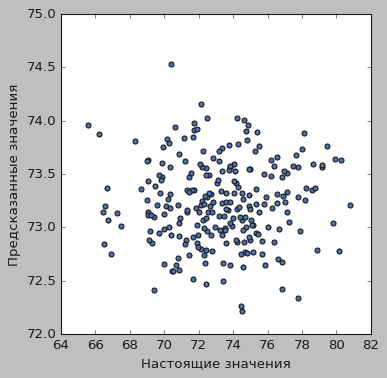

In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test_df, y_pred_df)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

1.15 RandomForestRegressor

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=600, num=3)]

max_depth = [int(x) for x in np.linspace(10, 110, num=3)]

max_depth.append(None)
min_samples_leaf = [1, 2, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

{'n_estimators': [100, 350, 600],
 'max_depth': [10, 60, 110, None],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf = RandomForestRegressor()

In [316]:
rf_random = GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
rf = rf_random.best_estimator_

In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2', metrics.r2_score(y_test, y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

In [ ]:
# Преобразуем с исходный масштаб
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = standart_scaler_y.inverse_transform(y_pred_df)

y_test_df = pd.DataFrame(y_test)
y_test_df = standart_scaler_y.inverse_transform(y_test_df)

In [ ]:
plt.figure (figsize = (5,5))
plt.scatter(y_test_df, y_pred_df)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

## Сравнение результатов

In [320]:
Regression = [LinearRegression(),
              Lasso(),
              LassoCV(),
              KNeighborsRegressor(),
              RandomForestRegressor()
              ]

In [359]:
log_cols=["Regression", "e", "MSE", "R2", "MAPE"]
log = pd.DataFrame(columns=log_cols)
for reg in Regression:
    reg.fit(X_train, y_train)
    name = reg.__class__.__name__

    print("-"*30)
    print(name)

    print('****Results****')
    y_pred = reg.predict(X_test)
    e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print("RMSE: {}".format(e))

    MSE = metrics.mean_squared_error(y_test, y_pred)
    print("MSE: {}".format(MSE))

    R2 = metrics.r2_score(y_test, y_pred)
    print("R2: {}".format(R2))

    MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print("MAPE: {:.4%}".format(MAPE))

    log_entry = pd.DataFrame([[name, e, MSE, R2, MAPE]], columns=log_cols)
    log = pd.concat([log,log_entry],ignore_index=True)
print("-"*30)

------------------------------
LinearRegression
****Results****
RMSE: 1.0018997828500147
MSE: 1.0038031748749068
R2: -0.025842106570635348
MAPE: 128.9533%
------------------------------
Lasso
****Results****
RMSE: 0.9892123004895087
MSE: 0.9785409754397462
R2: -2.526465000474154e-05
MAPE: 100.0562%
------------------------------
LassoCV
****Results****
RMSE: 0.9912345347504132
MSE: 0.9825459028818683
R2: -0.004118122001647295
MAPE: 107.4596%
------------------------------
KNeighborsRegressor
****Results****
RMSE: 1.075397606159339
MSE: 1.156480011333237
R2: -0.18187102883069084
MAPE: 220.0788%


/tmp/ipython-input-359-2042551399.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log,log_entry],ignore_index=True)


------------------------------
RandomForestRegressor
****Results****
RMSE: 1.0094624362962417
MSE: 1.0190144102931435
R2: -0.04138731122385897
MAPE: 168.2908%
------------------------------


In [360]:
log

,Regression,e,MSE,R2,MAPE
0,LinearRegression,1.001900,1.003803,-0.025842,1.289533
1,Lasso,0.989212,0.978541,-0.000025,1.000562
2,LassoCV,0.991235,0.982546,-0.004118,1.074596
3,KNeighborsRegressor,1.075398,1.156480,-0.181871,2.200788
4,RandomForestRegressor,1.009462,1.019014,-0.041387,1.682908


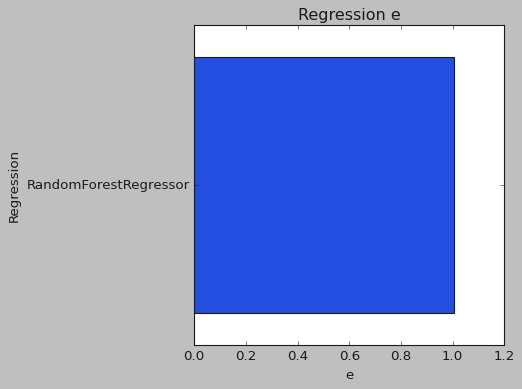

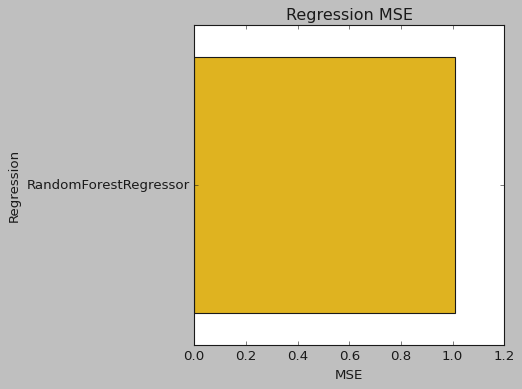

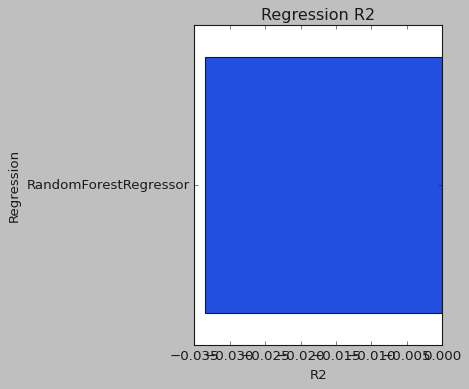

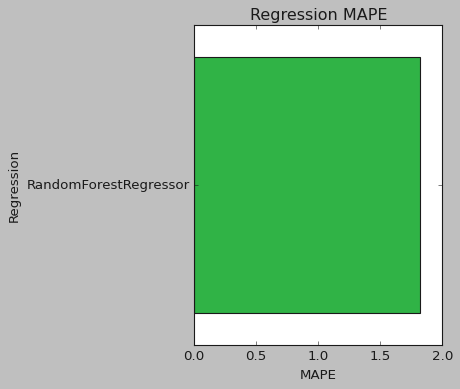

In [355]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set_color_codes("bright")
sns.barplot(x='e', y='Regression', data=log, color="b")

plt.xlabel('e')
plt.title('Regression e')
plt.show()

fig, ax = plt.subplots(figsize=(5, 5))
sns.set_color_codes("bright")
sns.barplot(x='MSE', y='Regression', data=log, color="y")

plt.xlabel('MSE')
plt.title('Regression MSE')
plt.show()

fig, ax = plt.subplots(figsize=(4, 5))
sns.set_color_codes("bright")
sns.barplot(x='R2', y='Regression', data=log, color="b")

plt.xlabel('R2')
plt.title('Regression R2')
plt.show()

fig, ax = plt.subplots(figsize=(4, 5))
sns.set_color_codes("bright")
sns.barplot(x='MAPE', y='Regression', data=log, color="g")

plt.xlabel('MAPE')
plt.title('Regression MAPE')
plt.show()